In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:")
print(tf.config.list_physical_devices())

TensorFlow version: 2.16.2
Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


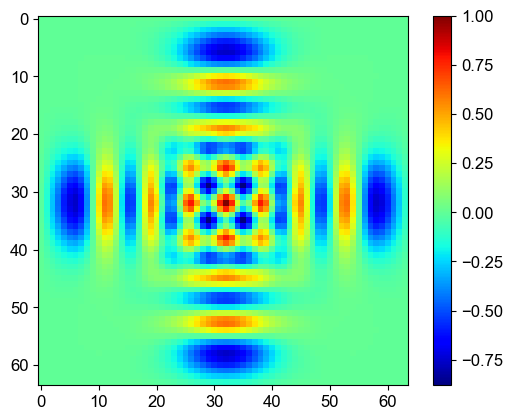

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

modes = loadmat('/Users/firdevsyuce/Desktop/bora_svmodes/modes.mat')['phi1']
modes = np.transpose(modes, (2, 0, 1))
modes = modes[:, ::8, ::8]
E_modes = (modes[:120])
plt.imshow((E_modes[-1]), cmap='jet')
plt.colorbar()

In [ ]:
import numpy as np

Eint_path = "/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/breast bpm/stable_ppeak3_len_5.55_rawdata.npy"
Eint_fields = np.load(Eint_path, allow_pickle=True)

print("Loaded file.")
print("Array shape:", Eint_fields.shape)



Loaded file.
Array shape: (780, 64, 64)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mode_decomposition(E_MMF, E_modes, dx=54e-6 / 64, dy=54e-6 / 64):


    N_modes = len(E_modes)
    a = np.zeros(N_modes, dtype=complex) # coefficient matrix per mode
    K = np.zeros(N_modes)

    # Compute normalization and coefficients
    for i in range(N_modes):
        Ei = E_modes[i]
        K[i] = np.sum(np.abs(Ei)**2) * dx * dy #modes are treated as an orthonormal basis
        a[i] = np.sum(E_MMF * np.conj(Ei)) * dx * dy / K[i]

    # Compute normalized modal powers
    power = np.abs(a)**2 * K
    power_frac = power / np.sum(power)

    # Reconstruct total field from modes
    E_reconstructed = np.zeros_like(E_MMF, dtype=complex)
    for i in range(N_modes):
        E_reconstructed += a[i] * E_modes[i]

    return a, power_frac, E_reconstructed


if __name__ == "__main__":
    nx, ny = 64, 64
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y)


    # Perform decomposition
    num_speckles = len(Eint_fields)               # change to your actual number
    N_modes = len(E_modes)
    coeff_matrix = np.zeros((num_speckles, N_modes), dtype=complex)
    power_frac_all = np.zeros((num_speckles, N_modes), dtype=complex)
    reconstructed_fields = []

    for idx, Eint in enumerate(Eint_fields):


        a, power_frac, E_rec = mode_decomposition(Eint, E_modes, dx=x[1]-x[0], dy=y[1]-y[0])
        coeff_matrix[idx, :] = a # coefficient matrix for all speckles
        power_frac_all[idx, :] = power_frac
        reconstructed_fields.append(E_rec)

    reconstructed_fields = np.array(reconstructed_fields)

    #np.save("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/coeff matrix/sinc coeff /coeff_matrix_sinc_input_beam_speckle.npy",
        #coeff_matrix)
    #np.save("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/coeff matrix/sinc coeff /power_fraction_sinc_input_beam_.npy", power_frac_all)
    #np.save("/Users/firdevsyuce/Desktop/2025 LPT/Why optics need mode/coeff matrix/breast coeff/reconstructed_fields_unperturbed_breast.npy", reconstructed_fields)




/opt/anaconda3/envs/pytorch/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/pytorch/lib/python3.12/site-packages/matplotlib/transforms.py:758: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


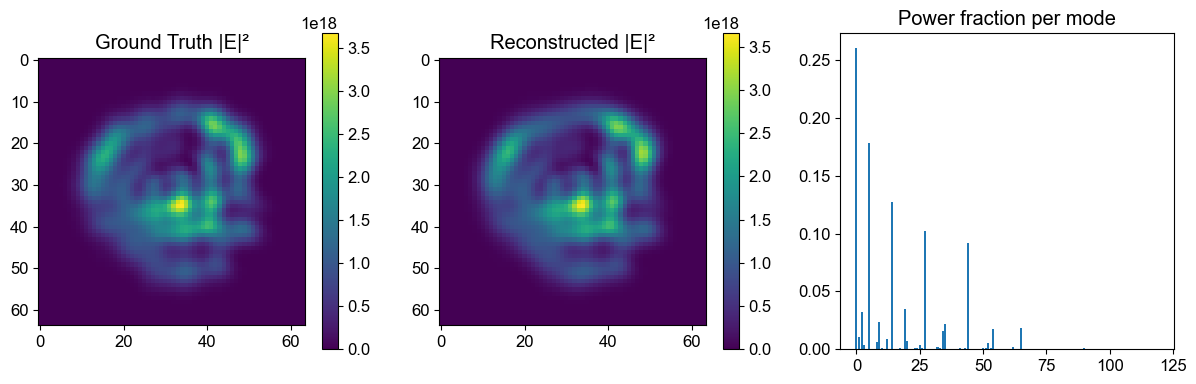

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
speckle_number = int(45)

im0 = axs[0].imshow(np.abs(Eint_fields[speckle_number])**2)
axs[0].set_title("Ground Truth |E|²")
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(np.abs(reconstructed_fields[speckle_number])**2)
axs[1].set_title("Reconstructed |E|²")
fig.colorbar(im1, ax=axs[1])

axs[2].bar(range(len(a)), power_frac_all[speckle_number])
axs[2].set_title("Power fraction per mode")

plt.tight_layout()
plt.show()

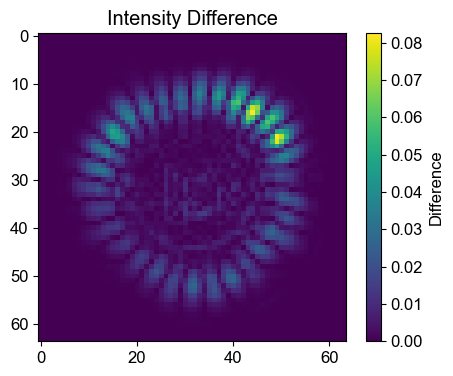

In [ ]:
diff_intensity = np.abs((np.abs(reconstructed_fields[speckle_number])**2/np.max(np.abs(reconstructed_fields[speckle_number])**2)) - (np.abs(Eint_fields[speckle_number])**2/np.max(np.abs(Eint_fields[speckle_number])**2)))

plt.figure(figsize=(5,4))
plt.imshow(diff_intensity)
plt.title("Intensity Difference" )
plt.colorbar(label='Difference')
plt.show()

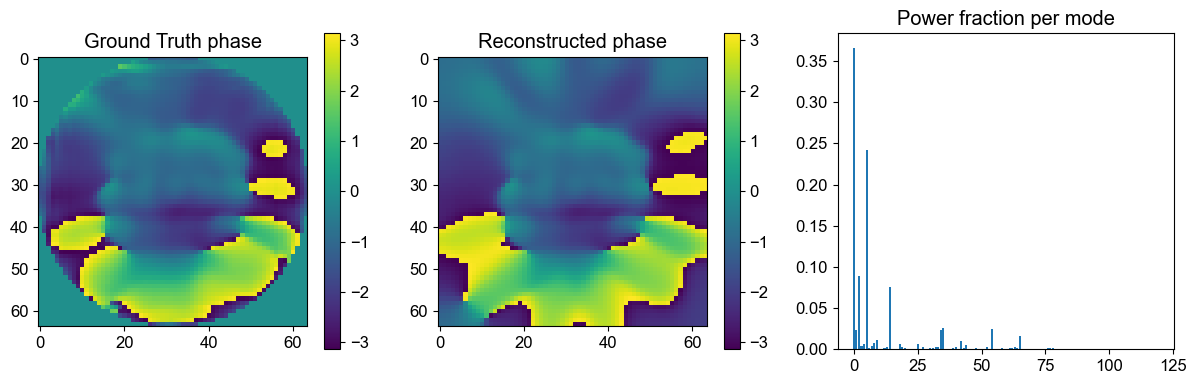

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
speckle_number = int(3)
# First image
im0 = axs[0].imshow(np.angle(Eint_fields[speckle_number]))
axs[0].set_title("Ground Truth phase")
fig.colorbar(im0, ax=axs[0])

# Second image
im1 = axs[1].imshow(np.angle(reconstructed_fields[speckle_number]))
axs[1].set_title("Reconstructed phase")
fig.colorbar(im1, ax=axs[1])

# Bar plot (no colorbar needed)
axs[2].bar(range(len(a)), power_frac_all[speckle_number])
axs[2].set_title("Power fraction per mode")

plt.tight_layout()
plt.show()

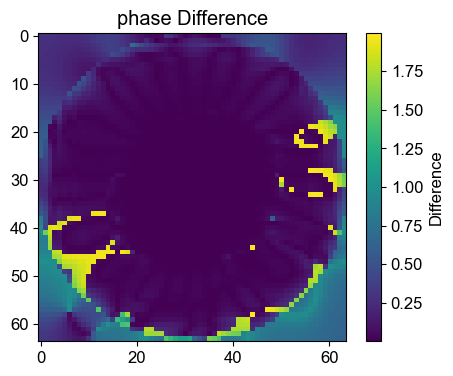

In [ ]:
diff_phase = np.abs((np.angle(reconstructed_fields[speckle_number])/np.max(np.angle(reconstructed_fields[speckle_number]))) - (np.angle(Eint_fields[speckle_number])/np.max(np.angle(Eint_fields[speckle_number]))))

plt.figure(figsize=(5,4))
plt.imshow(diff_phase)
plt.title("phase Difference" )
plt.colorbar(label='Difference')
plt.show()

In [ ]:
row = power_frac_all[-1]
sorted_idx = np.argsort(row)[::-1]

sorted_vals = row[sorted_idx]

print("Sorted indices:", sorted_idx)
print("Sorted values:", sorted_vals)


Sorted indices: [  0   5  14  27   9  44  19  34  35   1   2  65  32  54  33  42  63   7
  18  12  77  62  53  20   8  25   6  43  64  23  61  41  76  49  24  90
  66  16  58  26  60  51  47  52  29  74  70   3  78  68  40  46  31  37
  71  80  59 108  21  82  38  13   4  50 107  81  93  48  17  75  30  72
  55 110  83  11  89  45  94  36 109  57  91  56  39  86  15  73  22  28
  87  85  67  10  99 101  96  84  69 103  92  95 114 112 100 115 113  88
  79 116 117 102  98 104  97 106 119 111 105 118]
Sorted values: [2.96736121e-01+0.j 1.97958942e-01+0.j 1.10597222e-01+0.j
 8.10080468e-02+0.j 4.91841400e-02+0.j 3.56629927e-02+0.j
 3.31665816e-02+0.j 2.48838235e-02+0.j 2.38704976e-02+0.j
 2.30674051e-02+0.j 1.02295057e-02+0.j 8.34241089e-03+0.j
 7.41071710e-03+0.j 7.36298681e-03+0.j 7.09881165e-03+0.j
 5.13445840e-03+0.j 5.04892138e-03+0.j 4.50922023e-03+0.j
 4.43028318e-03+0.j 4.33352249e-03+0.j 3.59238859e-03+0.j
 3.32625754e-03+0.j 3.32625266e-03+0.j 3.27808167e-03+0.j
 2.82714142e-03+0

In [ ]:
abs_vals = np.abs(power_frac_all)
mode_totals = abs_vals.sum(axis=0)   # sum over speckles, summing down rows, summing each mode’s contribution across all speckles.
sorted_indices = np.argsort(mode_totals)[::-1]
sorted_power = abs_vals[:, sorted_indices]


In [ ]:
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i+1}: Mode {idx}, Total Power = {mode_totals[idx]:.4f}")

Rank 1: Mode 0, Total Power = 226.1758
Rank 2: Mode 5, Total Power = 115.0438
Rank 3: Mode 14, Total Power = 61.2015
Rank 4: Mode 2, Total Power = 40.6956
Rank 5: Mode 27, Total Power = 39.5271
Rank 6: Mode 9, Total Power = 27.0499
Rank 7: Mode 44, Total Power = 26.8593
Rank 8: Mode 8, Total Power = 21.7890
Rank 9: Mode 19, Total Power = 20.7352
Rank 10: Mode 35, Total Power = 17.4082
Rank 11: Mode 20, Total Power = 15.8776
Rank 12: Mode 1, Total Power = 15.8457
Rank 13: Mode 34, Total Power = 13.8226
Rank 14: Mode 54, Total Power = 11.7561
Rank 15: Mode 12, Total Power = 10.6907
Rank 16: Mode 3, Total Power = 10.1554
Rank 17: Mode 25, Total Power = 9.9938
Rank 18: Mode 42, Total Power = 8.7851
Rank 19: Mode 65, Total Power = 7.8105
Rank 20: Mode 53, Total Power = 7.3441
Rank 21: Mode 4, Total Power = 5.7302
Rank 22: Mode 13, Total Power = 5.5919
Rank 23: Mode 26, Total Power = 4.8936
Rank 24: Mode 43, Total Power = 4.0268
Rank 25: Mode 63, Total Power = 3.6402
Rank 26: Mode 32, Total 

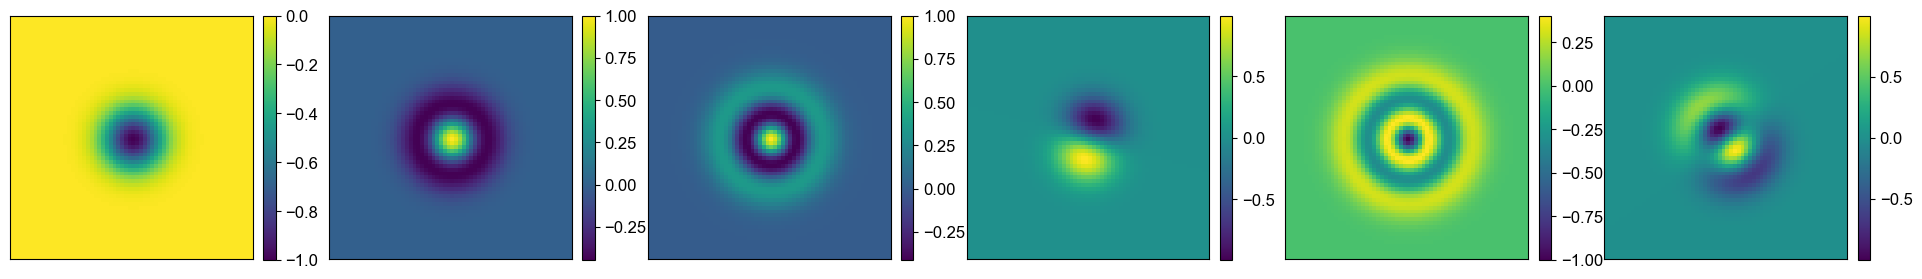

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
im0 = axs[0].imshow((E_modes[sorted_indices[0]]))
fig.colorbar(im0, ax=axs[0], fraction = 0.046, pad = 0.04)
im1 = axs[1].imshow((E_modes[sorted_indices[1]]))
fig.colorbar(im1, ax=axs[1], fraction = 0.046, pad = 0.04)
im2 = axs[2].imshow((E_modes[sorted_indices[2]]))
fig.colorbar(im2, ax=axs[2], fraction = 0.046, pad = 0.04)
im3 = axs[3].imshow((E_modes[sorted_indices[3]]))
fig.colorbar(im3, ax=axs[3],fraction = 0.046, pad = 0.04)
im4 = axs[4].imshow((E_modes[sorted_indices[4]]))
fig.colorbar(im4, ax=axs[4], fraction = 0.046, pad = 0.04)
im5 = axs[5].imshow((E_modes[sorted_indices[5]]))
fig.colorbar(im5, ax=axs[5], fraction = 0.046, pad = 0.04)
for j in range(6):
    axs[j].set_xticks([])
    axs[j].set_yticks([])
    axs[j].set_xticklabels([])
    axs[j].set_yticklabels([])

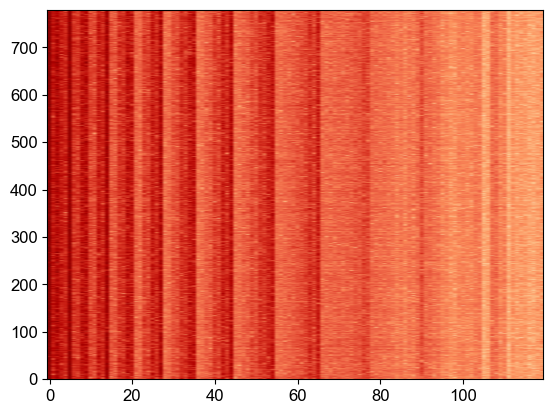

In [ ]:
plt.imshow(np.log10(np.abs(power_frac_all)), cmap="OrRd", origin="lower", aspect="auto")